In [16]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
import config


In [8]:
df = pd.read_csv('../../data/data_daily_with_aqi.csv')
target = 'AQI'
city ='北京'
df_tgt = df[df.type==target].drop('type',axis=1)
df_tgt_ct = df_tgt[['date',city]].rename(columns={'date':'ds',city:'y'})
df_tgt_ct = df_tgt_ct.dropna()

In [15]:

model = pm.auto_arima(df_tgt_ct['y'], start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=28763.535, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29490.235, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=28767.189, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=28926.297, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31802.386, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=28664.518, Time=1.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=28764.955, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=28738.099, Time=1.22 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=28676.986, Time=1.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=28676.559, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=28759.106, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=28747.301, Time=1.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=28658.624, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=28991.432, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0

In [34]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2585
Model:               SARIMAX(4, 0, 2)   Log Likelihood              -14319.943
Date:                Mon, 16 May 2022   AIC                          28653.886
Time:                        22:18:34   BIC                          28694.889
Sample:                             0   HQIC                         28668.747
                               - 2585                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4180      0.023     18.028      0.000       0.373       0.463
ar.L2          0.9248      0.028     33.061      0.000       0.870       0.980
ar.L3         -0.3950      0.015    -27.120      0.0

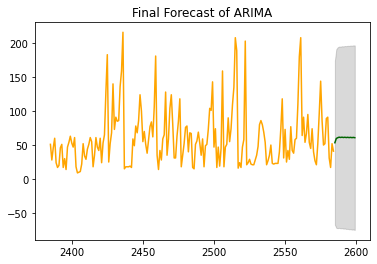

In [32]:
y = df_tgt_ct.y.reset_index(drop=True)
# Forecast
n_periods = 15
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df_tgt_ct.y), len(df_tgt_ct.y)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(y[-200:],color = 'orange')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of ARIMA")
plt.show()